In [31]:
import requests
import os
import urllib3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotnine

In [110]:
activities_sum = pd.read_json("/Users/janwignall/strava/activites.json")
activities_sum_df = pd.DataFrame(activities_sum)


In [111]:
activities_sum_df.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_cadence', 'average_temp',
       'average_watts', 'max_watts', 'weighted_average_watts', 'kilojoules',
       'device_watts', 'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed'],
      dtype='object')

In [128]:
MILES_PER_METER = 0.000621371
MINUTES_PER_HOUR = 60
FEET_PER_METER = 3.28084


activities_sum_df.head()
activities_sum_df['start_date_local'] = pd.to_datetime(activities_sum_df['start_date_local'])
activities_sum_df = activities_sum_df.loc[~activities_sum_df['date'].astype(str).str.contains("2018")]
activities_sum_df['date'] = activities_sum_df['start_date_local'].dt.floor('D')
activities_sum_df.sort_values('start_date', ascending = True, inplace = True)

activities_sum_df['elevpm'] = activities_sum_df['total_elevation_gain'] / activities_sum_df['distance']
# convert from meters to miles. 
activities_sum_df['distance_mi'] = activities_sum_df['distance'] * MILES_PER_METER
# how many total heart beats did my activity have?
activities_sum_df['total_beats'] = activities_sum_df['moving_time']/MINUTES_PER_HOUR * activities_sum_df['average_heartrate']

#cummulative sum
activities_sum_df = activities_sum_df[activities_sum_df['type'] == 'Ride'].copy()
#activities_sum_df['cumulative_sum_1yr'] = activities_sum_df.set_index('date')['distance_mi'].rolling('365D').sum().reset_index(drop=True)
activities_sum_df['cumulative_sum_1yr'] = activities_sum_df.apply(
    lambda x: activities_sum_df[(activities_sum_df['date'] <= x['date']) & (activities_sum_df['date'] > x['date'] - pd.DateOffset(years=1))]['distance_mi'].sum(),
    axis=1)
activities_sum_df['cumulative_sum_1yr_elev'] = activities_sum_df.apply(
    lambda x: activities_sum_df[(activities_sum_df['date'] <= x['date']) & (activities_sum_df['date'] > x['date'] - pd.DateOffset(years=1))]['total_elevation_gain'].sum(),
    axis=1)

activities_sum_df['cumsum_mi'] = activities_sum_df['distance_mi'].cumsum()
activities_sum_df['cumsum_hr'] = activities_sum_df['total_beats'].cumsum()
activities_sum_df['cumsum_elev'] = activities_sum_df['total_elevation_gain'].cumsum() * FEET_PER_METER

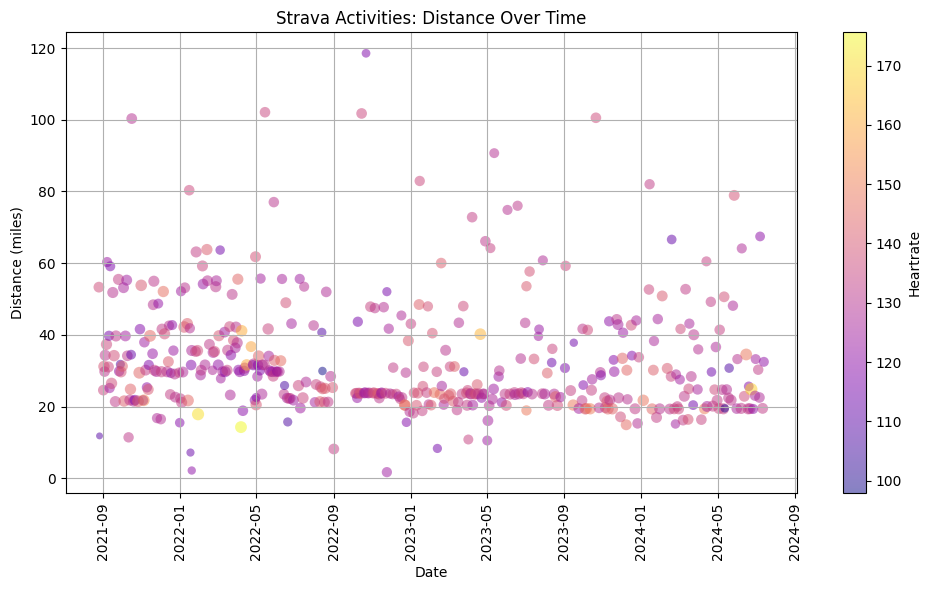

In [82]:
activities_sum_df2 = activities_sum_df.loc[activities_sum_df['average_heartrate'] > 0]
start_dates = activities_sum_df2['date']
distances = activities_sum_df2['distance_mi']
heartrates = activities_sum_df2['average_heartrate']
sizes = activities_sum_df2['average_watts']**0.8

plt.figure(figsize=(10, 6))
plt.scatter(start_dates,
            distances,
            s=sizes, #size
            c=heartrates, #color
            cmap='plasma',
            alpha=0.5,
            edgecolors='none')
plt.title('Strava Activities: Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (miles)')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
cbar = plt.colorbar()
cbar.set_label('Heartrate')
plt.tight_layout()
plt.show()


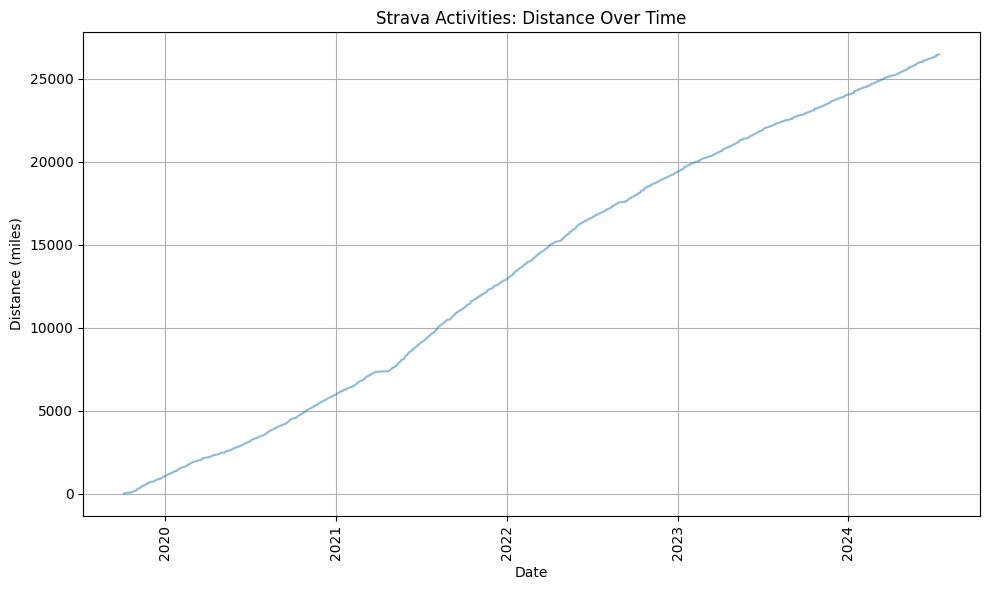

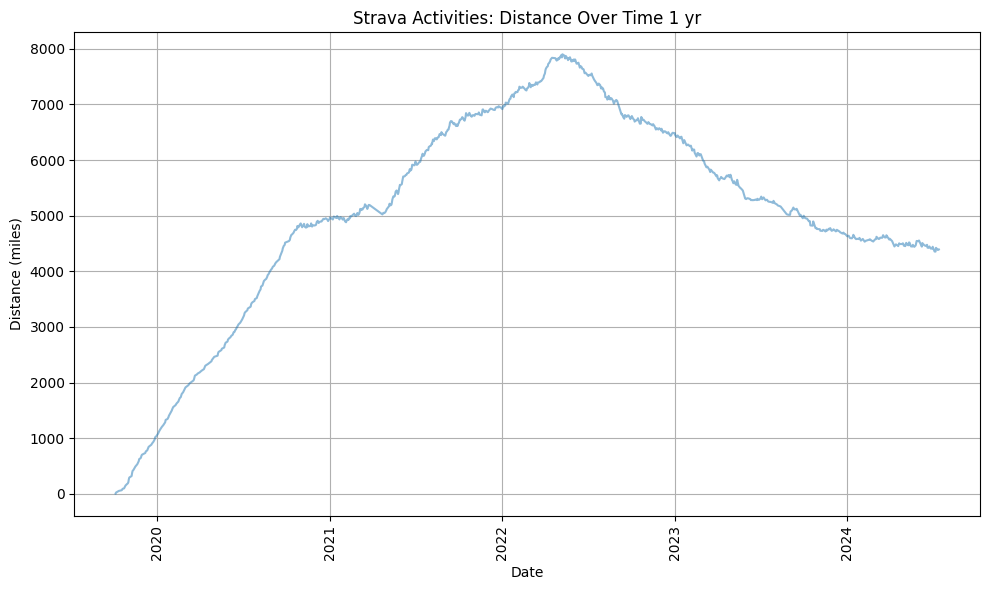

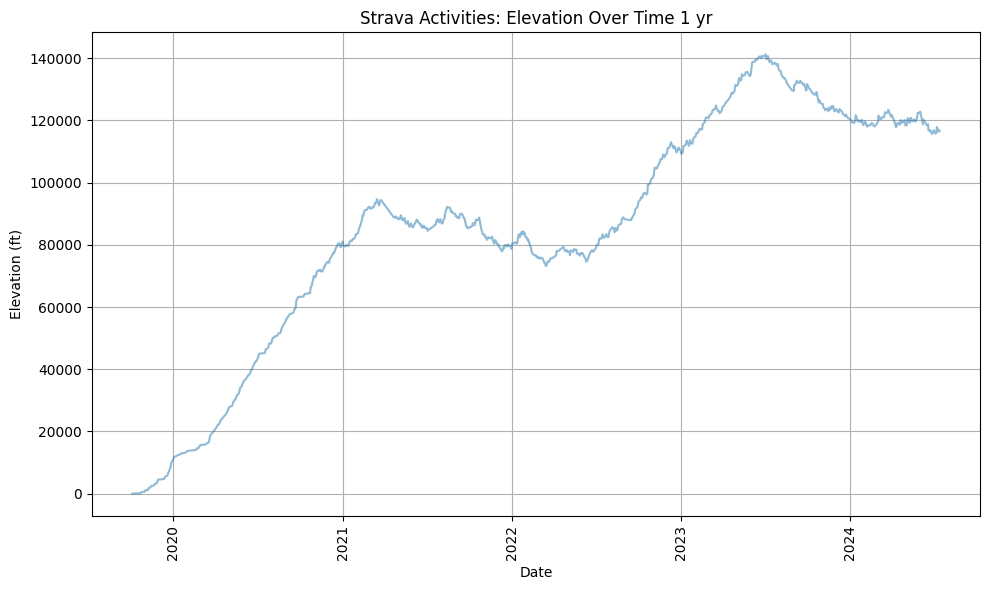

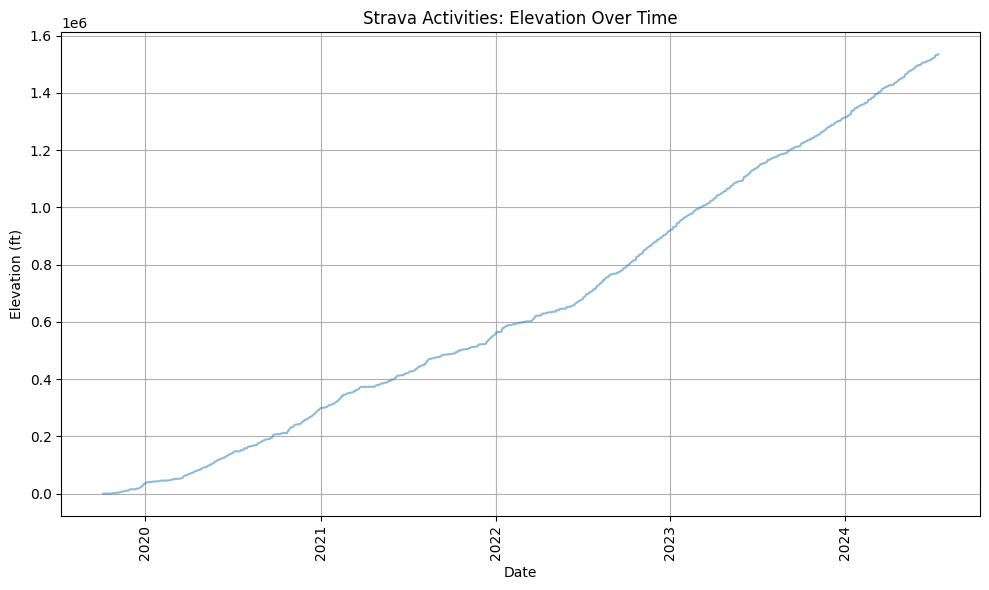

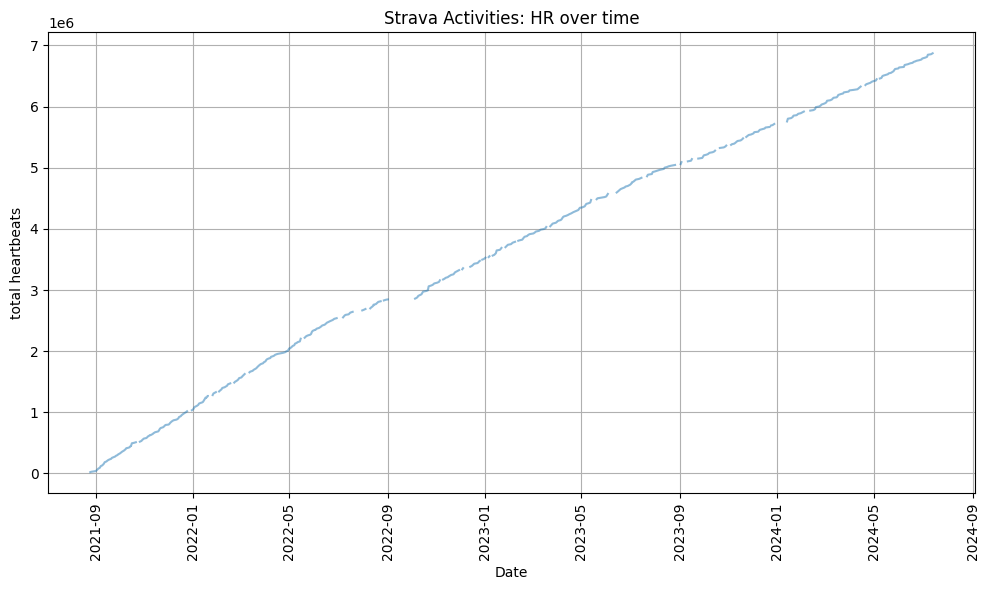

In [130]:
##########################
#    total distance      # ------------------ # ------------------ # ------------------ # ------------------ #
##########################
start_dates = activities_sum_df['date']
cum_sums = activities_sum_df['cumsum_mi']

plt.figure(figsize=(10, 6))
plt.plot(start_dates,
            cum_sums,

            alpha=0.5)
plt.title('Strava Activities: Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (miles)')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
plt.tight_layout()
plt.show()
##########################
#    total distance      # ------------------ # ------------------ # ------------------ # ------------------ #
##########################
start_dates = activities_sum_df['date']
cum_sums = activities_sum_df['cumulative_sum_1yr']

plt.figure(figsize=(10, 6))
plt.plot(start_dates,
            cum_sums,

            alpha=0.5)
plt.title('Strava Activities: Distance Over Time 1 yr')
plt.xlabel('Date')
plt.ylabel('Distance (miles)')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
plt.tight_layout()
plt.show()
##########################
#    total elevation 1 yr      # ------------------ # ------------------ # ------------------ # ------------------ #
##########################
start_dates = activities_sum_df['date']
cum_sums = activities_sum_df['cumulative_sum_1yr_elev']

plt.figure(figsize=(10, 6))
plt.plot(start_dates,
            cum_sums,

            alpha=0.5)
plt.title('Strava Activities: Elevation Over Time 1 yr')
plt.xlabel('Date')
plt.ylabel('Elevation (ft)')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
plt.tight_layout()
plt.show()
##########################
#    total elevation     # ------------------ # ------------------ # ------------------ # ------------------ #
##########################
start_dates = activities_sum_df['date']
cum_sums = activities_sum_df['cumsum_elev']

plt.figure(figsize=(10, 6))
plt.plot(start_dates,
            cum_sums,

            alpha=0.5)
plt.title('Strava Activities: Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (ft)')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
plt.tight_layout()
plt.show()

##########################
#  total heart beats     # ------------------ # ------------------ # ------------------ # ------------------ #
##########################
start_dates = activities_sum_df['date']
cum_sums = activities_sum_df['cumsum_hr']

plt.figure(figsize=(10, 6))
plt.plot(start_dates,
            cum_sums,

            alpha=0.5)
plt.title('Strava Activities: HR over time')
plt.xlabel('Date')
plt.ylabel('total heartbeats')
plt.grid(True)
plt.xticks(rotation=90)
#legend lol
plt.tight_layout()
plt.show()

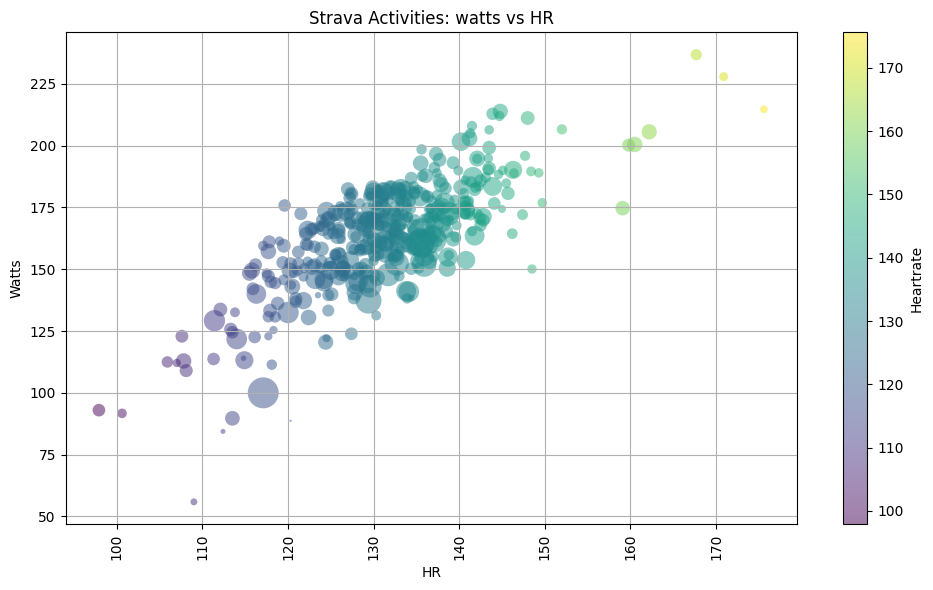

In [27]:
##########################
#  avg HR vs avg watts   #  ------------------ # ------------------ # ------------------ # ------------------ #
##########################

plt.figure(figsize=(10, 6))
plt.scatter(activities_sum_df['average_heartrate'],
            activities_sum_df['average_watts'],
            s=activities_sum_df['distance_mi'] **1.3, #size
            c=activities_sum_df['average_heartrate'], #color
            cmap='viridis',
            alpha=0.5,
            edgecolors='none')
plt.title('Strava Activities: watts vs HR')
plt.xlabel('HR')
plt.ylabel('Watts')
plt.grid(True)
plt.xticks(rotation=90)

#hr values
cbar = plt.colorbar()
cbar.set_label('Heartrate')

plt.tight_layout()
plt.show()
h

/usr/local/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 452 rows containing missing values.


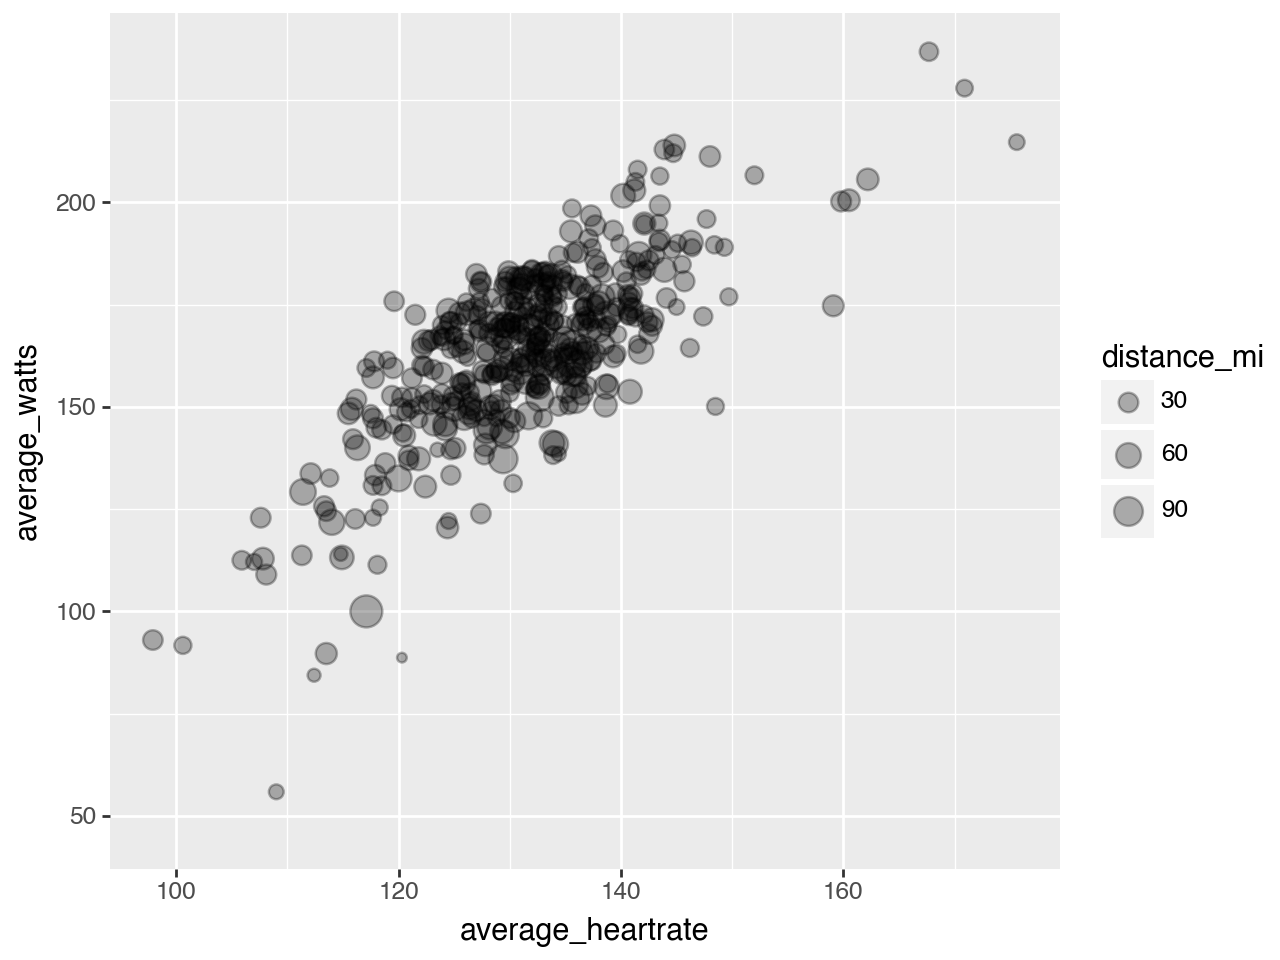

In [51]:
# testing ggplot.

(
    plotnine.ggplot(activities_sum_df, plotnine.aes("average_heartrate", "average_watts", size="distance_mi"))
    + plotnine.geom_point(alpha = 0.3)
)